## クラス別モデリング

![](../docs/output/learn相関ヒートマップ.png)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from seaborn import heatmap
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

In [3]:
raw = pd.read_excel("../data/raw/kadai.xlsx")
display(raw.shape)
learn_X = raw.iloc[:1776, 3:86]
learn_y = raw.iloc[:1776, 2]
results = {}
clustered_labels = {}

# クラスタ数 k=3 を仮に設定（必要に応じて調整）
k = 3
ranges = [
    (1, 21),
    (22, 42),
    (43, 63),
    (64, 83)
]

for idx, (start, end) in enumerate(ranges, 1):
    cols = [f"X{i}" for i in range(start, end + 1)]
    available_cols = [c for c in cols if c in learn_X.columns]
    X = learn_X[available_cols]
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(X)
    clustered_labels[f"cluster_group_{idx}"] = labels
    results[f"group_{idx}"] = km

for key, labels in clustered_labels.items():
    learn_X[key] = labels

learn_X


(2276, 86)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X78,X79,X80,X81,X82,X83,cluster_group_1,cluster_group_2,cluster_group_3,cluster_group_4
0,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.0,4.1,0.00,0.01,0.16,0.04,2,0,1,0
1,22.45,9.40,803.80,0.68,0.15,0.08,56.11,5.27,33.98,0.96,...,0.0,4.1,0.00,0.01,0.16,0.04,2,1,0,0
2,22.03,1.14,594.52,0.64,0.14,0.08,51.57,6.15,10.44,0.94,...,0.0,4.1,0.00,0.01,0.16,0.04,2,0,2,0
3,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.0,4.1,0.00,0.01,0.16,0.04,2,0,2,0
4,22.98,1.37,797.20,0.67,0.15,0.08,67.15,9.86,37.23,0.94,...,0.0,4.1,0.00,0.01,0.16,0.04,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,23.62,9.35,705.91,0.64,0.14,0.08,127.48,4.25,7.30,0.93,...,0.0,2.7,0.02,0.01,0.25,0.04,2,1,0,0
1772,23.62,9.35,705.91,0.64,0.14,0.08,127.48,4.25,7.30,0.93,...,0.0,2.7,0.02,0.01,0.25,0.04,2,1,0,0
1773,23.62,9.35,705.91,0.64,0.14,0.08,127.48,4.25,7.30,0.93,...,0.0,2.7,0.02,0.01,0.25,0.04,2,1,0,0
1774,23.62,9.35,705.91,0.64,0.14,0.08,127.48,4.25,7.30,0.93,...,0.0,2.7,0.02,0.01,0.25,0.04,2,1,0,0


In [4]:
# cluster_group_1〜4のone-hotエンコーディング
onehot = OneHotEncoder(sparse_output=False, categories="auto")

# clusterを先に空のDataFrameで用意
cluster = pd.DataFrame(index=learn_X.index)

for i in range(1, 5):
    ohe_cluster = onehot.fit_transform(learn_X[[f"cluster_group_{i}"]])
    ohe_cluster_df = pd.DataFrame(
        ohe_cluster,
        columns=[f"cluster_group_{i}_{cat}" for cat in onehot.categories_[0]],
        index=learn_X.index
    )
    cluster = pd.concat([cluster, ohe_cluster_df], axis=1)

cluster_ov = pd.concat([cluster, learn_y], axis=1)
cluster_ov

,cluster_group_1_0,cluster_group_1_1,cluster_group_1_2,cluster_group_2_0,cluster_group_2_1,cluster_group_2_2,cluster_group_3_0,cluster_group_3_1,cluster_group_3_2,cluster_group_4_0,cluster_group_4_1,cluster_group_4_2,OV
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,111.2886
1,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,201.5617
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,111.9410
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,182.3914
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,196.2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,107.8289
1772,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,127.8525
1773,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,116.4156
1774,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,131.6603


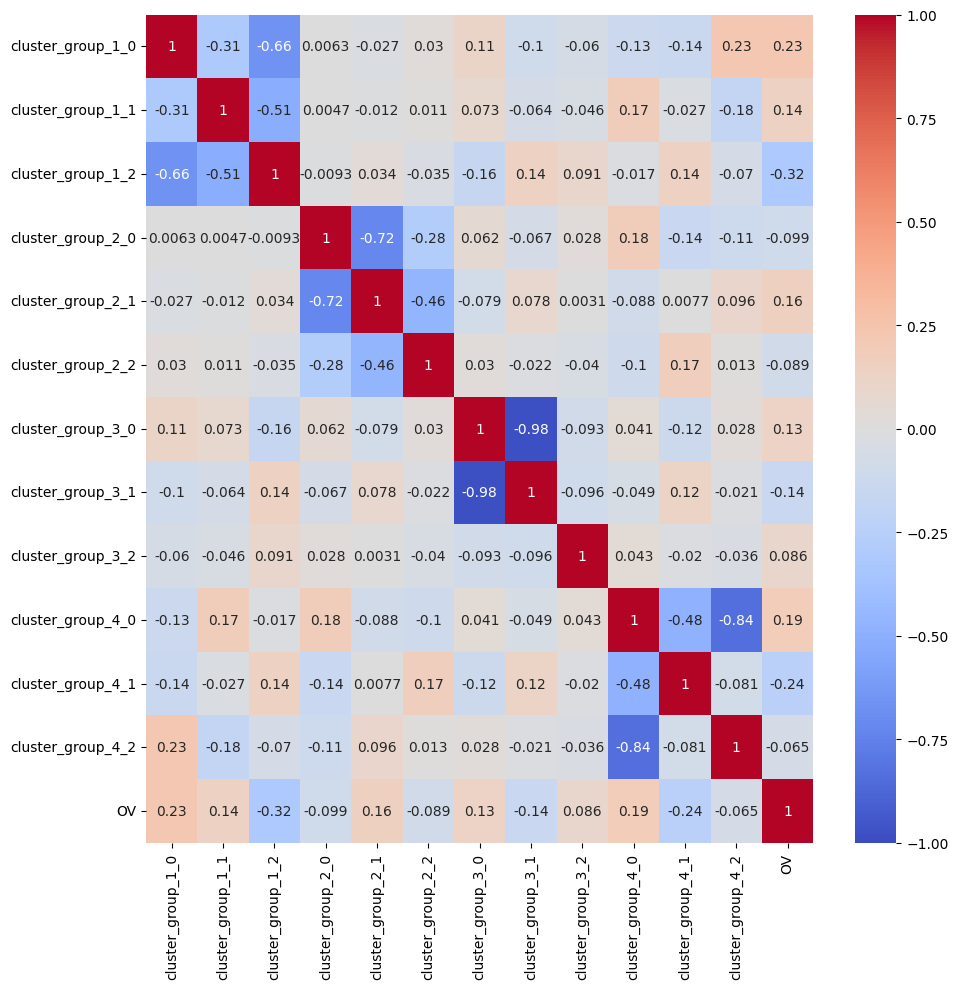

In [8]:
corr = cluster_ov.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.tight_layout()
plt.savefig('../docs/output/learn相関ヒートマップ.png')
plt.show()

In [15]:
cluster = 1
c_cols = [f"cluster_group_{cluster}_0", f"cluster_group_{cluster}_1", f"cluster_group_{cluster}_2"]

tmp_c = cluster_ov.copy()
tmp_c[f"cluster{cluster}"] = tmp_c[c_cols].values.argmax(axis=1).astype(int)

plot_df = raw[["OV"]].join(tmp_c[c_cols + [f"cluster{cluster}"]])  # indexでjoin
plot_df = plot_df.sort_index()

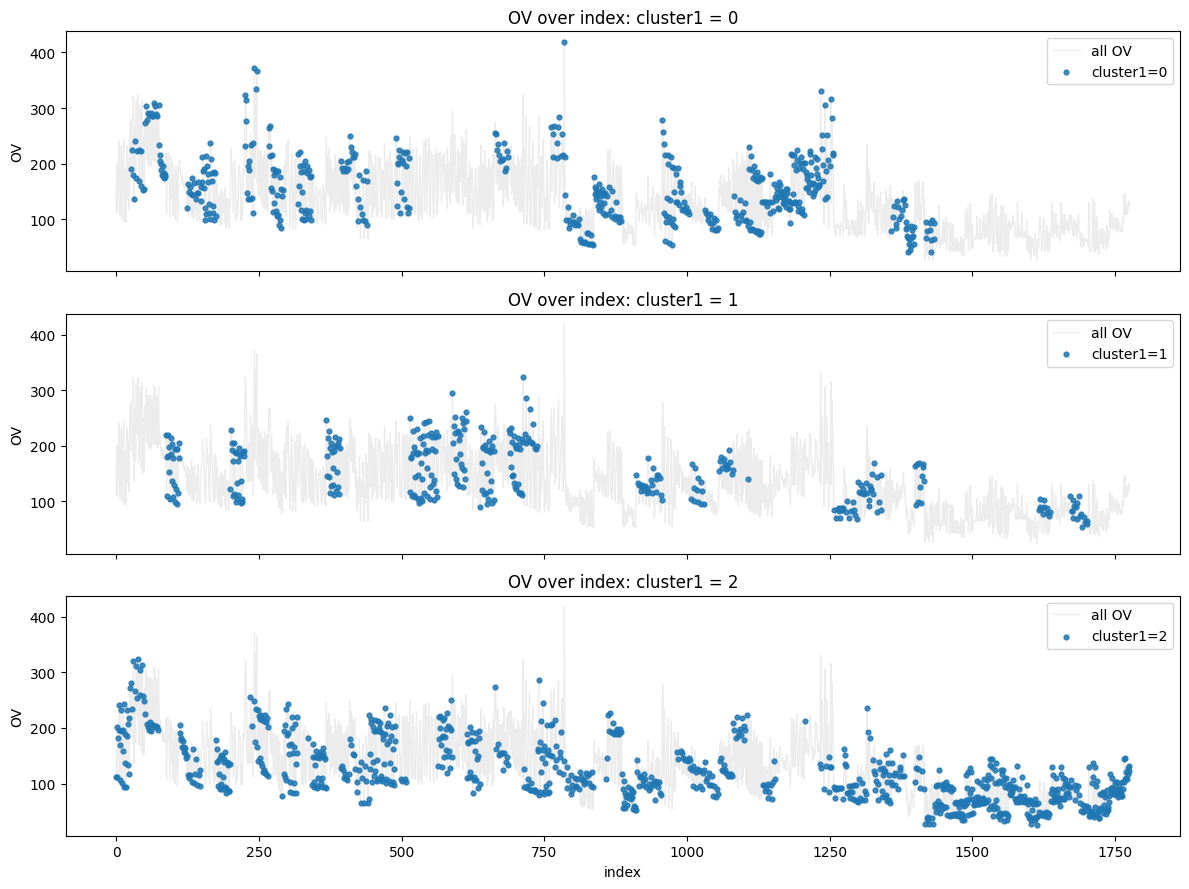

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

# 並べる順にループ 0,1,2
for j, ax in zip(range(3), axes):
    # そのクラスだけ抽出
    gdf = plot_df[plot_df[f"cluster{cluster}"] == j]
    ax.plot(
        plot_df[:1776].index, 
        plot_df[:1776]["OV"], 
        linewidth=1, 
        alpha=0.15, 
        color='gray', 
        zorder=1,
        label='all OV'
    )
    ax.scatter(
        gdf.index, 
        gdf["OV"], 
        s=12, 
        alpha=0.85, 
        label=f"cluster{cluster}={j}", 
        zorder=2
    )
    ax.set_ylabel("OV")
    ax.set_title(f"OV over index: cluster{cluster} = {j}")
    ax.legend(loc="upper right")

plt.xlabel("index")
plt.tight_layout()
plt.show()